In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12 or int(torch.__version__.split(".")[0]) == 2, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 2.1.2
torchvision version: 0.16.2


In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo. Installing it.")
    !pip install -q torchinfo
    from trochinfo import summary

In [3]:
import git

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    repo = git.Repo.clone_from('git@github.com:mrdbourke/pytorch-deep-learning.git',
                           'D:\Document\GitHub\Vit_deployment\main',
                           branch='main')
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [4]:
# Get device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1 Get the data

In [5]:
# Create image size
IMG_SIZE = 224

# Create transform pipeline manualy
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms : {manual_transforms}")

Manually created transforms : Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


In [6]:
train_data = torchvision.datasets.CIFAR100(
    root= "data",
    train = True,
    download=True,
    transform = manual_transforms,
    target_transform=None
)

test_data = torchvision.datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=manual_transforms,
    target_transform=None
)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
print(f"Train data :\n{train_data}\nTest data: \n{test_data}")

Train data :
Dataset CIFAR100
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Test data: 
Dataset CIFAR100
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


In [8]:
# Get class names as a list
class_names = train_data.classes
class_names

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [9]:
# Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'apple': 0,
 'aquarium_fish': 1,
 'baby': 2,
 'bear': 3,
 'beaver': 4,
 'bed': 5,
 'bee': 6,
 'beetle': 7,
 'bicycle': 8,
 'bottle': 9,
 'bowl': 10,
 'boy': 11,
 'bridge': 12,
 'bus': 13,
 'butterfly': 14,
 'camel': 15,
 'can': 16,
 'castle': 17,
 'caterpillar': 18,
 'cattle': 19,
 'chair': 20,
 'chimpanzee': 21,
 'clock': 22,
 'cloud': 23,
 'cockroach': 24,
 'couch': 25,
 'crab': 26,
 'crocodile': 27,
 'cup': 28,
 'dinosaur': 29,
 'dolphin': 30,
 'elephant': 31,
 'flatfish': 32,
 'forest': 33,
 'fox': 34,
 'girl': 35,
 'hamster': 36,
 'house': 37,
 'kangaroo': 38,
 'keyboard': 39,
 'lamp': 40,
 'lawn_mower': 41,
 'leopard': 42,
 'lion': 43,
 'lizard': 44,
 'lobster': 45,
 'man': 46,
 'maple_tree': 47,
 'motorcycle': 48,
 'mountain': 49,
 'mouse': 50,
 'mushroom': 51,
 'oak_tree': 52,
 'orange': 53,
 'orchid': 54,
 'otter': 55,
 'palm_tree': 56,
 'pear': 57,
 'pickup_truck': 58,
 'pine_tree': 59,
 'plain': 60,
 'plate': 61,
 'poppy': 62,
 'porcupine': 63,
 'possum': 64,
 'rabbit': 65,

In [10]:
# Check the length
len(train_data),len(test_data)

(50000, 10000)

In [11]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7137, 0.7137, 0.7137],
         [1.0000, 1.0000, 1.0000,  ..., 0.7137, 0.7137, 0.7137],
         [1.0000, 1.0000, 1.0000,  ..., 0.7137, 0.7137, 0.7137],
         ...,
         [0.3412, 0.3412, 0.3412,  ..., 0.5412, 0.5412, 0.5412],
         [0.3412, 0.3412, 0.3412,  ..., 0.5412, 0.5412, 0.5412],
         [0.3412, 0.3412, 0.3412,  ..., 0.5412, 0.5412, 0.5412]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.7608, 0.7608, 0.7608],
         [1.0000, 1.0000, 1.0000,  ..., 0.7608, 0.7608, 0.7608],
         [1.0000, 1.0000, 1.0000,  ..., 0.7608, 0.7608, 0.7608],
         ...,
         [0.4784, 0.4784, 0.4784,  ..., 0.6784, 0.6784, 0.6784],
         [0.4784, 0.4784, 0.4784,  ..., 0.6784, 0.6784, 0.6784],
         [0.4784, 0.4784, 0.4784,  ..., 0.6784, 0.6784, 0.6784]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.6549, 0.6549, 0.6549],
         [1.0000, 1.0000, 1.0000,  ..., 0.6549, 0.6549, 0.6549],
         [1.0000, 1.0000, 1.0000,  ..., 0.65

Original shape: torch.Size([3, 224, 224]) -> [color_channels, heigth, width]
Image permute shape: torch.Size([224, 224, 3]) -> [heigth, width, color_channels]


Text(0.5, 1.0, 'cattle')

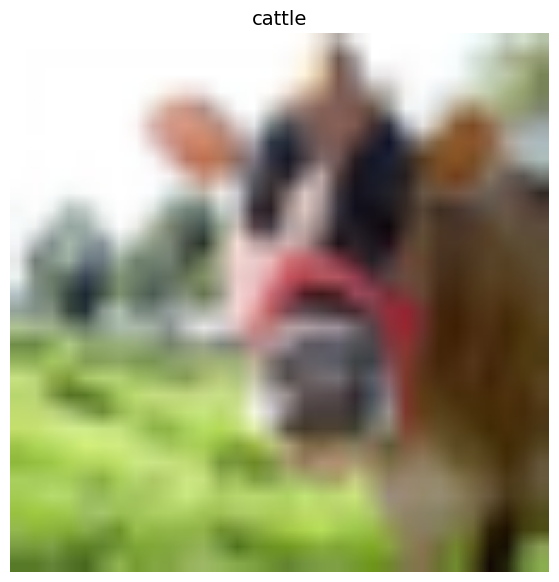

In [12]:
# Plot a single image tensor using matplotlib

# Rearange the order of dimensions
img_permute = img.permute(1,2,0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, heigth, width]")
print(f"Image permute shape: {img_permute.shape} -> [heigth, width, color_channels]")

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.title(class_names[label], fontsize = 14)

# 2 Create dataloaders

## 2.1 Turn images into dataloaders

In [13]:
from torch.utils.data import DataLoader
import os

# Set the batch size
BATCH_SIZE = 32

cpu_num = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = cpu_num,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers = cpu_num,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x24b7212ad10>,
 <torch.utils.data.dataloader.DataLoader at 0x24b7259b210>)

In [14]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(96))

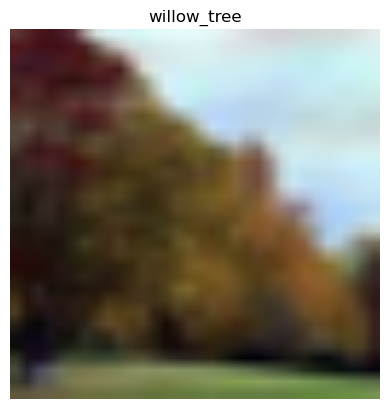

In [15]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

# 3.0 Replicating the ViT paper

## 3.1 Split data into patches and creating the class position and patch embedding

In [32]:
# Create example values
height = 224 # H 
width  = 224  # W
color_channels = 3 # C
patch_size = 16 # P

# Calculate N (number of patches)
number_of_patches = int((height * width) / patch_size**2)
print(f"Number of patches (N) with image height (H={height}), width (W={width}) and patch size (P={patch_size}): {number_of_patches}")

# Input shape
embedding_layer_input_shape = (height,width,color_channels)

# Output shape
embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 2D image flattened into patches): {embedding_layer_output_shape}")

Number of patches (N) with image height (H=224), width (W=224) and patch size (P=16): 196
Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches): (196, 768)


### 3.1.1 Turning image into patches

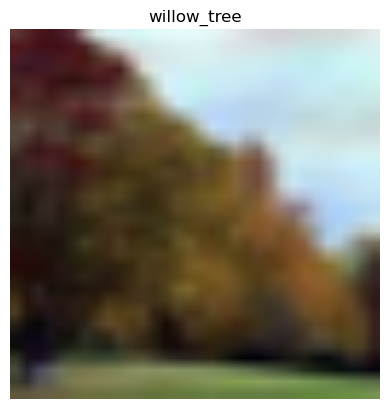

In [17]:
# View single image
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

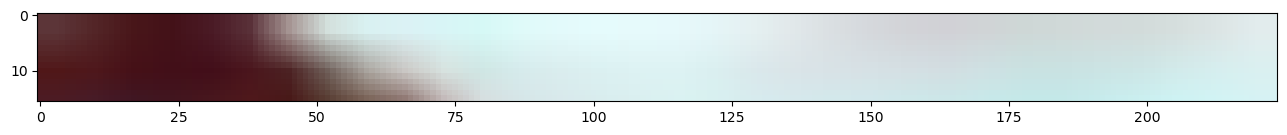

In [18]:
# Change image shape to be compatible with matplotlib
image_permuted = image.permute(1,2,0)

# Index to plot the top row of patched pixels
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :,: :]);

Number of patches is 14.0
Number of patches per row: 14.0
Patch size: 16 pixels x 16 pixels


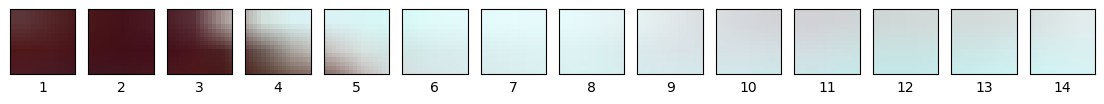

In [19]:
# Setup hyperparameters and make sure img_size patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
print(f'Number of patches is {num_patches}')

assert img_size % patch_size == 0,"Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\nPatch size: {patch_size} pixels x {patch_size} pixels")


# Create a series of subplots
fig, axs = plt.subplots(nrows = 1,
                       ncols = img_size // patch_size,
                       figsize = (num_patches, num_patches),
                       sharex = True,
                       sharey = True)

# Iterate through number of patches in the top row
for i, patch in enumerate(range(0,img_size, patch_size)):
    axs[i].imshow(image_permuted[:patch_size,patch:patch+patch_size,:]); # keep height index constant, alter the width index
    axs[i].set_xlabel(i+1) # set the label
    axs[i].set_xticks([])
    axs[i].set_yticks([])

Number of patches per row: 14.0        
Number of patches per column: 14.0        
Total patches: 196.0        
Patch size: 16 pixels x 16 pixels


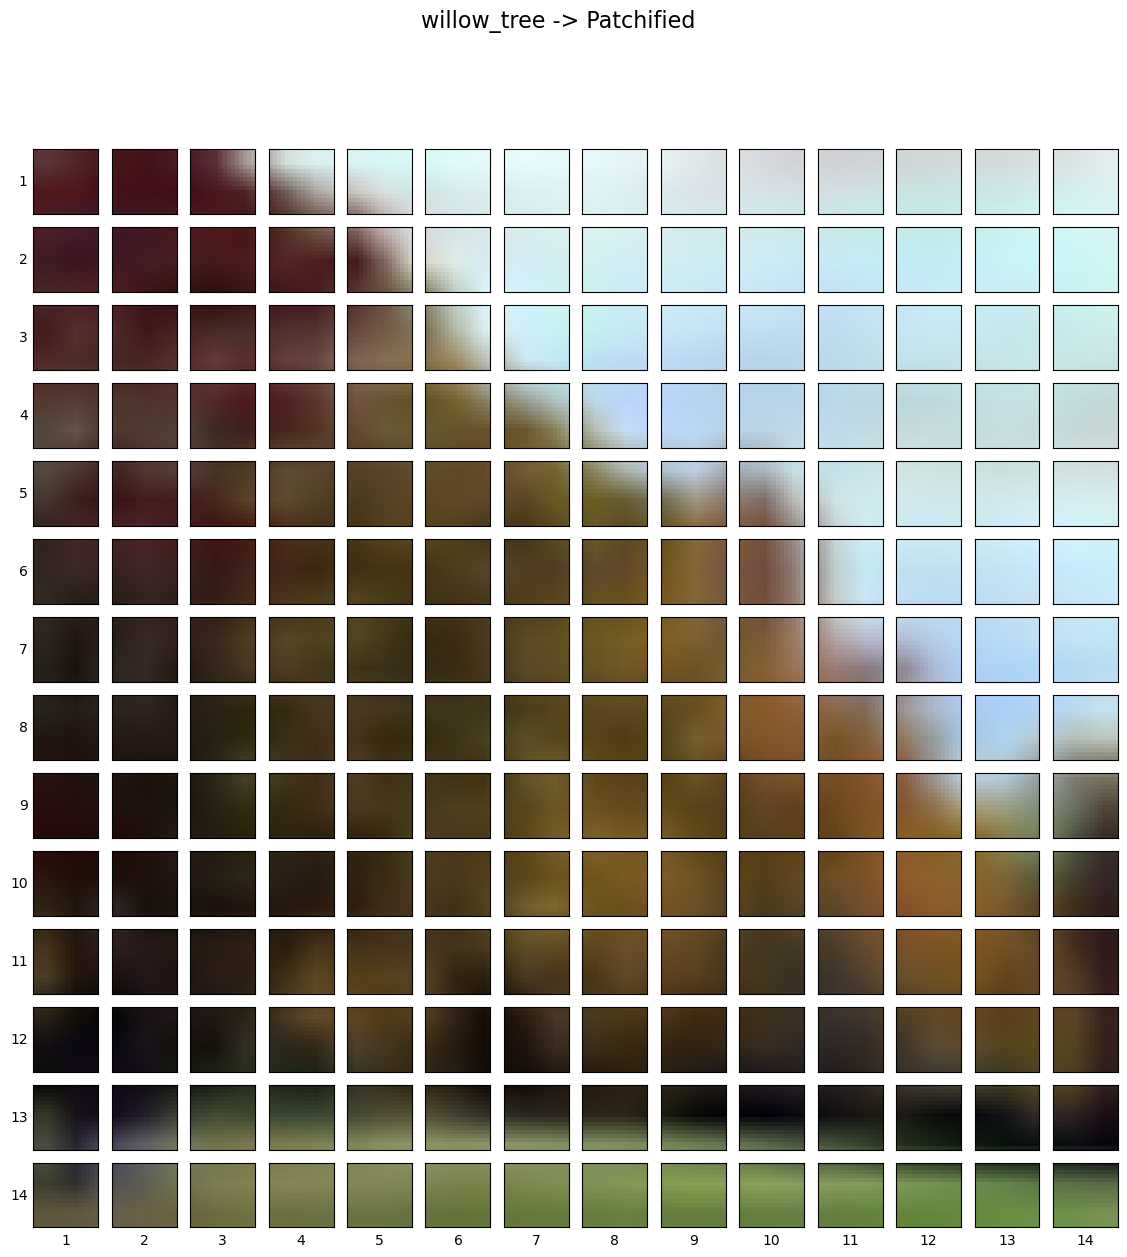

In [20]:
# Setup hyperparameters and make sure img_size and patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\
        \nNumber of patches per column: {num_patches}\
        \nTotal patches: {num_patches*num_patches}\
        \nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size, # need int not float
                        ncols=img_size // patch_size,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Loop through height and width of image
for i, patch_height in enumerate(range(0, img_size, patch_size)): # iterate through height
    for j, patch_width in enumerate(range(0, img_size, patch_size)): # iterate through width

        # Plot the permuted image patch (image_permuted -> (Height, Width, Color Channels))
        axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through height
                                        patch_width:patch_width+patch_size, # iterate through width
                                        :]) # get all color channels

        # Set up label information, remove the ticks for clarity and set labels to outside
        axs[i, j].set_ylabel(i+1,
                             rotation="horizontal",
                             horizontalalignment="right",
                             verticalalignment="center")
        axs[i, j].set_xlabel(j+1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

# Set a super title
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()

In [21]:
from torch import nn

# Set the patch size 
patch_size = 16

# Create the Conv2d layer with hyperparameters from the ViT paper
conv2d = nn.Conv2d(in_channels=3, # number of color channels
                   out_channels=768, # Embedding size
                   stride = patch_size, 
                   kernel_size= patch_size,
                   padding = 0)

(-0.5, 223.5, 223.5, -0.5)

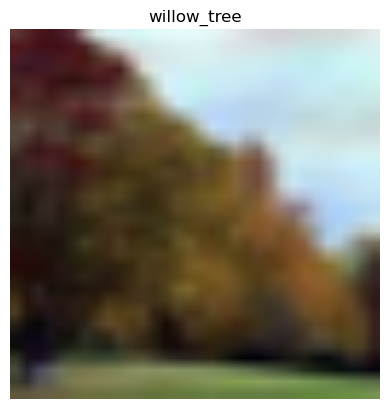

In [22]:
# View single image
plt.imshow(image.permute(1,2,0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False)

In [23]:
# Pass the image through the convolutional layer
image_out_of_conv = conv2d(image.unsqueeze(0))
print(image_out_of_conv.shape)

torch.Size([1, 768, 14, 14])


Showing random convolutional feature maps from indexes: [5, 115, 580, 181, 614]


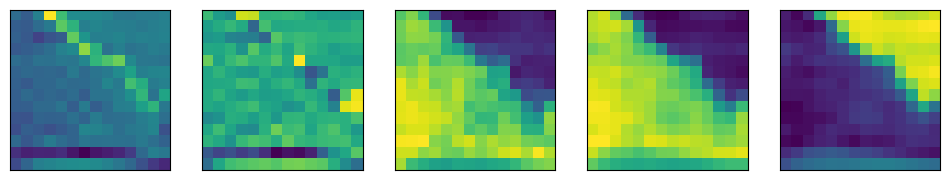

In [24]:
# Plot 5 random convolutional feature maps
import random
random_indexes = random.sample(range(0,758), k = 5) # Pick 5 numbers between 0 and the embeddging size
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (12,12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
    image_conv_feature_map = image_out_of_conv[:, idx, :, :]
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[],xticks=[],yticks=[]);

In [25]:
# Get a single feature map in tensor form
single_feature_map = image_out_of_conv[:, 0, :, :]
single_feature_map, single_feature_map.requires_grad

(tensor([[[ 0.1025,  0.0528,  0.1263,  0.3360,  0.2981,  0.2653,  0.2693,
            0.2710,  0.2602,  0.2242,  0.2037,  0.2099,  0.2080,  0.2285],
          [ 0.0523,  0.0560,  0.0737,  0.1077,  0.1570,  0.2233,  0.2319,
            0.2363,  0.2340,  0.2274,  0.2206,  0.2093,  0.2200,  0.2361],
          [ 0.0498,  0.0439,  0.0171,  0.0204,  0.0704,  0.1674,  0.2258,
            0.2310,  0.2312,  0.2235,  0.2085,  0.2225,  0.2284,  0.2364],
          [ 0.0675,  0.0614,  0.0895,  0.0740,  0.1543,  0.1916,  0.2664,
            0.1750,  0.1964,  0.1929,  0.1941,  0.2062,  0.2186,  0.2277],
          [ 0.1136,  0.0805,  0.1098,  0.1197,  0.1121,  0.1320,  0.1603,
            0.2444,  0.3165,  0.2312,  0.1930,  0.2164,  0.2039,  0.2088],
          [ 0.0470,  0.0610,  0.0485,  0.0644,  0.0805,  0.0962,  0.0935,
            0.1239,  0.1352,  0.0974,  0.1380,  0.2215,  0.2233,  0.2276],
          [ 0.0380,  0.0332,  0.0443,  0.0967,  0.1032,  0.0689,  0.0978,
            0.1487,  0.1682,  0.

The graient of this feature map will be updated by gradient descent during training

## 3.2 Flatening the patch embedding with `torch.nn.Flatten()`

In [26]:
# Checking the current tensor shape
print(f"Current tensor shape: {image_out_of_conv.shape} -> [batch_size, embedding_dim, feature_map_height, feature_map_width]")

Current tensor shape: torch.Size([1, 768, 14, 14]) -> [batch_size, embedding_dim, feature_map_height, feature_map_width]


We want to flatten only the spatial dimensions of our tensor so `feature_map_height` and `feature_map_width`. To do so we create a flatten layer

In [34]:
# Create a flatten layer
flatten = nn.Flatten(start_dim=2, # flatten feature_map_height (dimension 2)
                     end_dim = 3) # flatten feature_map_width (dimension 3)

Wrapping it all together : 

Original image shape: torch.Size([3, 224, 224])
Image feature map shape : torch.Size([1, 768, 14, 14])
Flattened iage feature map shape : torch.Size([1, 768, 196])


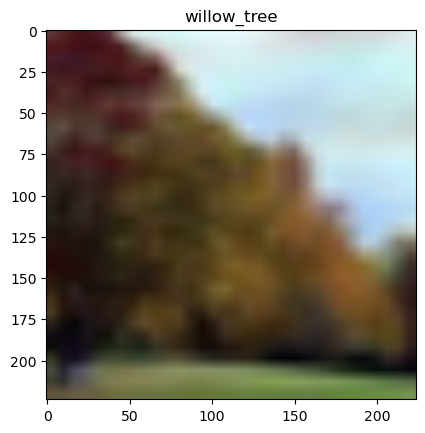

In [36]:
# 1. View a single image
plt.imshow(image.permute(1,2,0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis = False ;
print(f"Original image shape: {image.shape}")


# 2. Turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension to avoid shape errors
print(f"Image feature map shape : {image_out_of_conv.shape}")

# 3. Flatten the feature maps
image_out_of_conv_flatten = flatten(image_out_of_conv)
print(f"Flattened iage feature map shape : {image_out_of_conv_flatten.shape}")

We are very close of our desired output shape : (196, 768). We will need to rearrange the dimensions

In [39]:
# Get flattened image patch embeddings in right shape
image_out_of_conv_flattened_reshaped = image_out_of_conv_flatten.permute(0,2,1)
print(f"Flattened iage feature map shape : {image_out_of_conv_flattened_reshaped.shape}")

Flattened iage feature map shape : torch.Size([1, 196, 768])


Visualizing the feature map

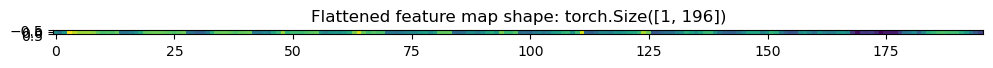

In [43]:
# Get a single flattened feature map
single_flattened_feature_map = image_out_of_conv_flattened_reshaped[:, :, 0] # index: (batch_size, number_of_patches, embedding_dimension)

# Plot the flattened feature map visually
plt.figure(figsize=(12, 12))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.axis = False

In [44]:
# Viewing the fleattened feature map as a tensor
single_flattened_feature_map, single_flattened_feature_map.requires_grad

(tensor([[ 0.1025,  0.0528,  0.1263,  0.3360,  0.2981,  0.2653,  0.2693,  0.2710,
           0.2602,  0.2242,  0.2037,  0.2099,  0.2080,  0.2285,  0.0523,  0.0560,
           0.0737,  0.1077,  0.1570,  0.2233,  0.2319,  0.2363,  0.2340,  0.2274,
           0.2206,  0.2093,  0.2200,  0.2361,  0.0498,  0.0439,  0.0171,  0.0204,
           0.0704,  0.1674,  0.2258,  0.2310,  0.2312,  0.2235,  0.2085,  0.2225,
           0.2284,  0.2364,  0.0675,  0.0614,  0.0895,  0.0740,  0.1543,  0.1916,
           0.2664,  0.1750,  0.1964,  0.1929,  0.1941,  0.2062,  0.2186,  0.2277,
           0.1136,  0.0805,  0.1098,  0.1197,  0.1121,  0.1320,  0.1603,  0.2444,
           0.3165,  0.2312,  0.1930,  0.2164,  0.2039,  0.2088,  0.0470,  0.0610,
           0.0485,  0.0644,  0.0805,  0.0962,  0.0935,  0.1239,  0.1352,  0.0974,
           0.1380,  0.2215,  0.2233,  0.2276,  0.0380,  0.0332,  0.0443,  0.0967,
           0.1032,  0.0689,  0.0978,  0.1487,  0.1682,  0.1270,  0.2406,  0.1867,
           0.189